<a href="https://colab.research.google.com/github/aquax-xmarine/AI/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Exploratory Data Analysis and Data Understanding

#Initial Analysis
a. When and by whom was the dataset created?

Ans: The dataset 'Maternal Health Risk' was created by Marzia Ahmed and her colleagues Mostafijur Rahman, Sabira Khatun, and Mohammod Abul Kashem for their research paper 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)' in March 2020.

b. How did you access the dataset?

Ans: The above dataset was accessed via Kaggle.

c. How does it align with the chosen UNSDG?

ANs: The dataset 'Maternal Health Risk' is closely aligned with the UNSDG3: Good Health and Well-being as it helps to prevent maternal mortality by detecting the symptoms beforehand.

d. List all the attributes (columns) present in the dataset.

Ans: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, and RiskLevel are the 7 attributes present in the dataset.  


# Research Question
How can we predict a woman’s systolic blood pressure based on other health parameters (age, diastolic blood pressure, blood sugar, body temperature, heart rate, and risk level)?

#Data Completeness
1. The dataset doesnot contain missing values making the utilization of data points effective.

2. The dataset has above 1000 rows which is sufficient for this task.

Limitation

1. The dataset is found to have more than half duplicate rows whcih might reduce the model's effectiveness.

2. RiskLevel is categorical (Low, Medium,and High) so it needs to be encoded.

#Data Relevance
1. Age: Highly relevant, as systolic blood pressure tends to increase with age.
2. DiastolicBP: Strongly correlated with systolic blood pressure; crucial for prediction.
3. BS (Blood Sugar): May impact blood pressure, particularly in diabetic individuals.
4. BodyTemp: Less directly related but could indicate an underlying condition.
5. HeartRate: Physiologically linked to blood pressure.
6. RiskLevel: If categorical, it might not be directly useful but could be transformed (e.g., ordinal encoding).

#Data Quality
1. The dataset comes from a published study, validating its origins.
2. The numericals values appears to be well-structured and measurable.

#Exploratory Data Analysis (EDA)

In [ ]:
# load the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

# Data cleaning and summary statistics


In [ ]:
# display basic information
print("Dataset Info: ")
print(df.info())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [ ]:
# Check for missing values
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
# Check for duplicate rows
print("Duplicated Rows: ", df.duplicated().sum())
df[df.duplicated(keep='first')]


Duplicated Rows:  562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# Remove duplicates(keep only one instance of each unique row)
df.drop_duplicates(inplace=True)
print("Duplicated Rows: ", df.duplicated().sum())
df[df.duplicated(keep='first')]

Duplicated Rows:  0


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [ ]:
print("Total rows after removing duplicates:", df.shape[0])

Total rows after removing duplicates: 452


In [ ]:
# Compute summary statistics
print("Summary Statistics: ")
print(df.describe())

Summary Statistics: 
              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  452.000000  452.000000   452.000000  452.000000  452.000000  452.000000
mean    29.194690  110.553097    75.418142    8.346173   98.692478   73.949115
std     13.767379   17.872282    13.754578    2.829209    1.410897    8.156973
min     10.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000   90.000000    65.000000    6.900000   98.000000   70.000000
50%     25.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     35.000000  120.000000    86.000000    7.900000   98.000000   80.000000
max     70.000000  160.000000   100.000000   19.000000  103.000000   90.000000


In [ ]:
# Display the first few rows
print("First 5 rows: ")
print(df.head())

First 5 rows: 
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


#Data Visualization


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


Text(0, 0.5, 'Frequency')

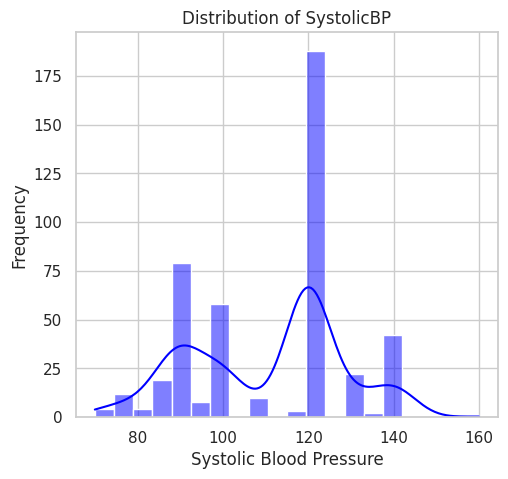

In [ ]:
# Histogram of SystolicBP
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["SystolicBP"], bins=20, kde=True, color="blue")
plt.title("Distribution of SystolicBP")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Frequency")

The above histogram demonstrates a bell-shaped curve which means SystolicBP follows a normal distribution. Hence, it is suitable for linear regression.

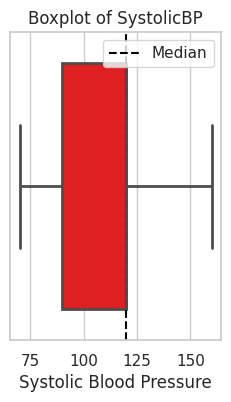

In [ ]:
#Boxplot of SystolicBP
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 2)
box = sns.boxplot(x=df["SystolicBP"], color="red", linewidth=2)

median_value = df["SystolicBP"].median()
plt.axvline(median_value, color="black", linestyle="--", label="Median")  # Dashed median line
plt.legend()

plt.xlabel("Systolic Blood Pressure")
plt.title("Boxplot of SystolicBP")

plt.show()


In the above box plot:

1. Median: Black dashed lines represent the median which is around 125
2. IQR: The red box represents the IQR which includes the middle 50% of the data. The lower boundary is around 90 while the upper boundary is around 130.
3. Whiskers: It extends to approximately 65 and 165, indicating overall range of the data points, excluding outliers.
4. Outliers: The plot doesnot display individuals dots beyond the whiskers, suggetsing no outliers.
5. Symmetry and Distribution: The median is placed at the edge of Q3, indicating left skewness.

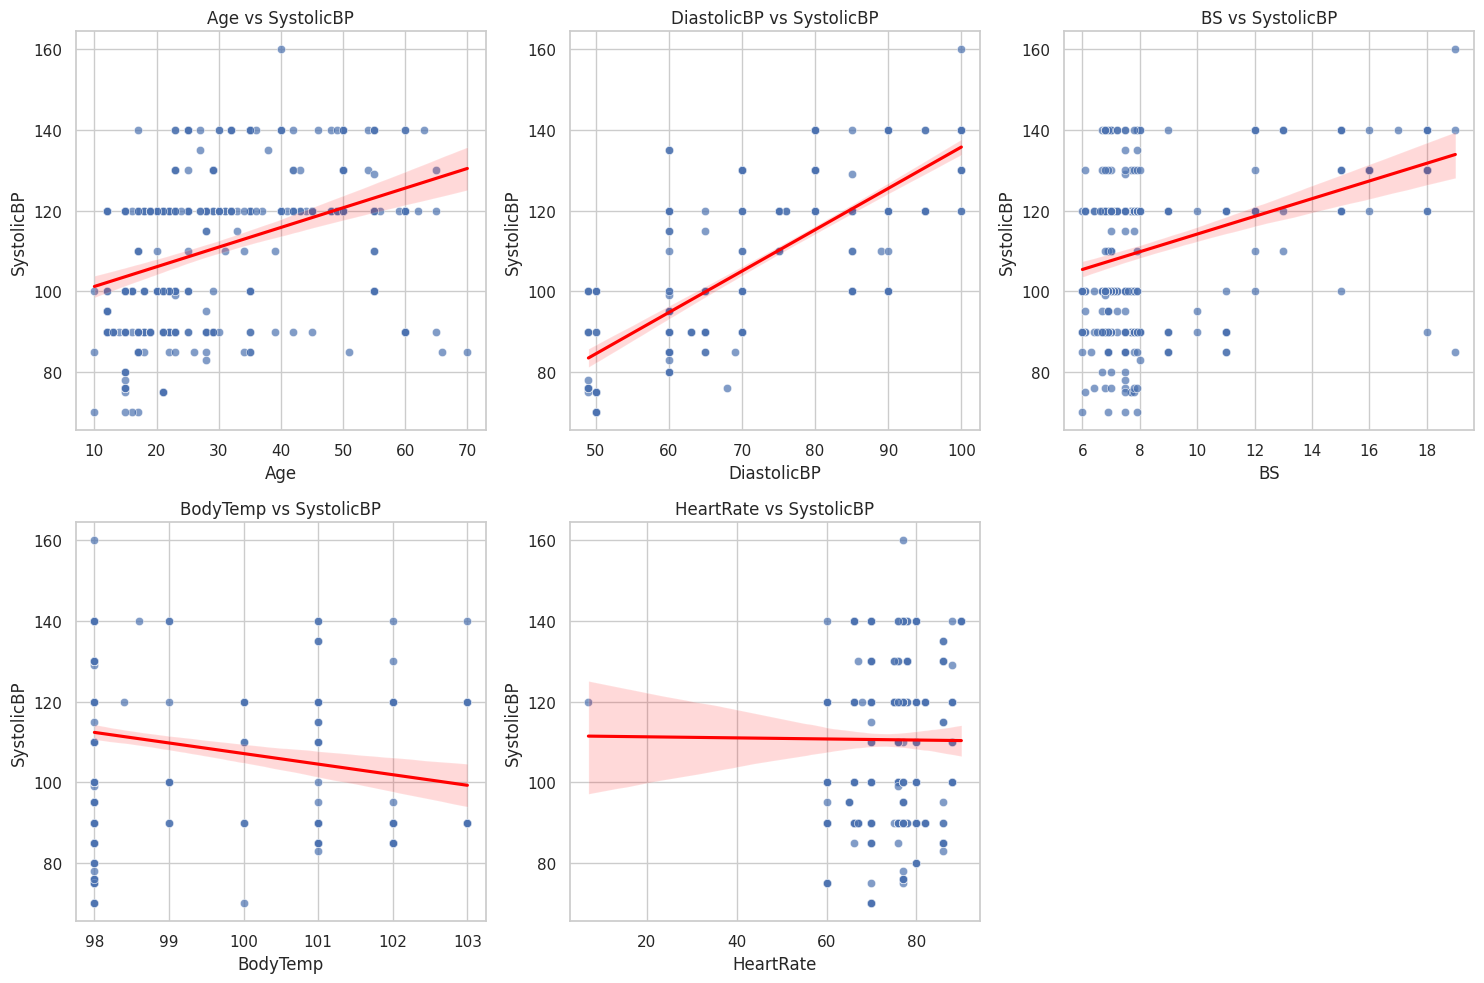

In [ ]:
# Scatterplots (Key Predictors vs. SystolicBP)
predictors = ["Age", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["SystolicBP"], alpha=0.7)
    sns.regplot(x=df[feature], y=df["SystolicBP"], scatter=False, color="red")  # Regression line
    plt.title(f"{feature} vs SystolicBP")

plt.tight_layout()
plt.show()

The figure contains 5 scatter plots, each examining the relationship between SystolicBP and a different avriable.

1. Age Vs. SystolicBP: There is a positive trend, indicated by red regression line. However, there are some spread in the data, meaning not all points align perfectly with the trend.

2. DiastolicBP Vs. SystolicBP: There is a strong positive relationship between DiastolicBP and SystolicBP, with the regression line showing a clear upward trend.

3. BS Vs. SystolivBP: There is a positive trend, indicated by red regression line. Similarly, there is noticeable variablility in SystolicBP at similar BS levels.

4. BodyTemp Vs. SystolicBP: There is a slight negative trend, inidcated by downward regression line. Similarly, the spread in data points indicates that this trend is weak.

5. HeartRate Vs. SystolicBP: The regression line is flat, showing no relationship between the variables. Furthermore, there is considerable variability in SystolicBP across different HeartRate values.

#2. Build a Model from Scratch

#Linear Regression

In [ ]:
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
#scale the feature matrix x
def scale_features(x_train, x_test, y_train=None, y_test=None):
  """
  scale features using Z-score normalization
  Arguments:
  x_train: np.ndarray; training data features
  x_test: np.ndarray; testing data features
  Returns:
  x_train_scaled: np.ndarray; scaled training data
  x_test_scaled: np.ndarray; scaled testing data
  """

  mean = np.mean(x_train, axis=0)
  std = np.std(x_train, axis=0)
  x_train_scaled = (x_train - mean) / std
  x_test_scaled = (x_test - mean) / std

  if y_train is not None and y_test is not None:
      mean_y = np.mean(y_train)
      std_y = np.std(y_train)
      y_train_scaled = (y_train - mean_y) / std_y
      y_test_scaled = (y_test - mean_y) / std_y
      return x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled
  else:
      return x_train_scaled, x_test_scaled



In [ ]:
#3.1.2-Building a cost function
import numpy as np
# define the cost function
def cost_function(x, y, w, regularization_strength=0.01):
  """
  Parameters:
  This function finds the Mean Square Error
  Input parameters:
    x: Feature Matrix
    y: Target Matrix
    w: Weight Matrix
  Output Parameters:
    cost: accumulated mean square error
  """
  # number of training examples
  n = len(y)

  # hypothesis: predicted values
  y_pred = np.dot(x, w)

  # comute the squared errors
  squared_errors = np.square(y_pred - y)

  # compute the mean squared error
  cost = (1 / (2 * n)) * np.sum(squared_errors)

  #add L2 regularization term to prevent overfitting
  cost += regularization_strength * np.sum(w**2)

  return cost

In [ ]:
def gradient_descent(x, y, w, alpha, iterations, momentum=0.9, regularization_strength=0.01, tolerance=1e-5):
    """
    Perform gradient descent to optimize the parameters of a linear regression model.

    Parameters:
      x (numpy.ndarray): Feature matrix (m x n).
      y (numpy.ndarray): Target vector (m x 1).
      w (numpy.ndarray): Initial guess for parameters (n x 1).
      alpha (float): Learning rate.
      iterations (int): Number of iterations for gradient descent.

    Returns:
      tuple: A tuple containing the final optimized parameters (w) and the history of cost values (cost_history).
    """
    # Initialize cost history
    cost_history = [0] * iterations

    # number of samples
    m = len(y)
    velocity = np.zeros_like(w)
    prev_cost = float('inf')  # Store previous cost


    for iteration in range(iterations):
        # Hypothesis Values
        y_pred = np.dot(x, w)  # predicted values

        # Difference between Hypothesis and Actual y
        loss = y_pred - y

        # Gradient Calculation
        dw = (1 / m) * np.dot(x.T, loss)  # gradient

        #  Adding regularization to gradient
        dw += regularization_strength * w

        # Update weights using gradient with momentum
        velocity = momentum * velocity + alpha * dw
        w -= velocity

        # New Cost Value
        cost = cost_function(x, y, w)  # assuming cost_function is defined elsewhere
        cost_history[iteration] = cost

        # Check for convergence: stop if the cost change is small
        if np.abs(prev_cost - cost) < tolerance:
            print(f"Converged at iteration {iteration+1}")
            break
        prev_cost = cost

    return w, cost_history


In [ ]:
#3.1.4 - Evaluate the Model
#1.Root Mean Square Error

# Model Evaluation - RMSE
def rmse(y, y_pred):
  """
  This function calculates the Root Mean Square.
  Input Arguments:
    y: array of actual (target) dependent variables
    y_pred: array of predicted dependent variables
  Output Arguments:
    rmse: Root Mean Square Error
  """
  # calculate the squared differences
  squared_diff = (y - y_pred) ** 2

  # calculate the mean squared error
  mse = np.mean(squared_diff)

  # return the square root of the mean squared error
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
# Model Evaluation - R2
def r2(y, y_pred):
  """
  This function calculates the R2 Squared Error.
  Input Arguments:
    y: array of actual (target) dependent variables
    y_pred: array of predicted dependent variables
  Output Arguments:
    rsquared: R squared error
  """
  # mean of actual values
  mean_y = np.mean(y)
  # calculate SST (Total Sum of Squares)
  ss_tot = np.sum((y - mean_y) ** 2)
  # calculate SSR (Sum of Squared Residuals)
  ss_res = np.sum((y - y_pred) ** 2)
  # calculate R-squared
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [ ]:
# Main function to integrate all steps
import pandas as pd
import numpy as np
def main():
  # Load dataset
  df = pd.read_csv("/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv")

  # Remove duplicate rows
  df.drop_duplicates(inplace=True)

  # Apply one-hot encoding to the 'RiskLevel' column
  df = pd.get_dummies(df, columns=['RiskLevel'], dtype=int)

  # Reset index to avoid any index mismatch
  df = df.reset_index(drop=True)

  # Separate the feature matrix (X) and target variable (y)
  X = df.drop('SystolicBP', axis=1)
  y = df['SystolicBP']


  # Convert to NumPy arrays (ONLY if still DataFrame)
  if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
  if isinstance(y, pd.DataFrame):
    y = y.to_numpy()

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3, random_seed=42)

  # Scale the feature matrix and the target variable
  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = scale_features(X_train, X_test, y_train, y_test)


  # Initialize weights(W) to zeros, learning rate and number of iterations
  W = np.zeros(X_train.shape[1]) #initialize weight
  alpha = 0.01 # decreasing learning rate
  iterations = 1000 #number of iterations for gradient descent

  # Perform gradient descent
  W_optimal, cost_history = gradient_descent(X_train_scaled, y_train_scaled, W, alpha, iterations)

  # Make prediction on the test set
  y_pred_scaled = np.dot(X_test_scaled, W_optimal)

  # Inverse scaling of the predictions and test target
  mean_y = np.mean(y_train)
  std_y = np.std(y_train)
  y_pred = y_pred_scaled * std_y + mean_y
  y_test = y_test_scaled * std_y + mean_y

  # Evaluate the model using RMSE and R-Squared
  model_rmse = rmse(y_test, y_pred)
  model_r2 = r2(y_test, y_pred)

  # Output the results
  print(f"Final Weights: ", W_optimal)
  print("Cost history (first 10 iterations): ", cost_history[:10])
  print("RMSE on test set: ", model_rmse)
  print("R-Squared on test set: ", model_r2)

# Execute the main function
if __name__ == "__main__":
  main()


Converged at iteration 55
Final Weights:  [ 0.0568161   0.74397831  0.02410301 -0.04643244 -0.00803921  0.0448559
 -0.09248136  0.06509176]
Cost history (first 10 iterations):  [0.4889344763563982, 0.4687353222326857, 0.44175115434472473, 0.4104706805164599, 0.3772879406165196, 0.34432132177050584, 0.3132913933237044, 0.28545657941449676, 0.26160087232293544, 0.24206439152988096]
RMSE on test set:  11.009199764471552
R-Squared on test set:  0.5879639849068738


1. RMSE(11.01): A lower RMSE indicates better performance. An RMSE of 11.01 suggests that, on average, the model’s predictions are off by about 11.01 units from the true value.

2. R-Squared(0.588): A value of 0.59 means that about 59% of the variance in the target variable is being explained by the model.

#3. Build a Primary Model

#KNN model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Apply one-hot encoding to categorical columns (e.g., 'RiskLevel')
df = pd.get_dummies(df, drop_first=True)

# Preprocess the data
X = df.drop('SystolicBP', axis=1)
y = df['SystolicBP']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors (k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Output the evaluation metrics with 3 decimal places
print(f"RMSE: {rmse:.3f}")
print(f"R-Squared: {r2:.3f}")


RMSE: 124.521
R-Squared: 0.581


#Random Forest

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Apply one-hot encoding to categorical columns (e.g., 'RiskLevel')
df = pd.get_dummies(df, drop_first=True)

# Preprocess the data
X = df.drop('SystolicBP', axis=1)
y = df['SystolicBP']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for Random Forest, but may improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Output the evaluation metrics with 3 decimal places
print(f"RMSE: {rmse:.3f}")
print(f"R-Squared: {r2:.3f}")


RMSE: 87.172
R-Squared: 0.707


According to the metrics comparison, Random Forest performed slightly better than KNN in terms of all the metrics. Therefore, Random Forest Regressor is the better model for this case.

#Hyper-parameter Optimization with Cross-Validation

#KNN with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]  # 1 = Manhattan distance, 2 = Euclidean distance
}

# Apply GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


#Random Forest with GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


#Feature Selection

#KNN Model Feature Selection with Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Feature Selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_regression, k=3)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'DiastolicBP', 'HeartRate'], dtype='object')


The goal of this process is to select most important features that provides the best combination of RMSE and R-Squared value in predicting the target variable.

1. Methodology(Mutual Information(MI)): Using the fitted selector through SelectKBest, we transformed both the training (X_train_selected) and test (X_test_selected) sets, keeping only the most informative features.

2. Why these features: The selected features (stored in selected_features) are the ones with the highest MI scores, indicating that they hold the most predictive power for the target variable.

#Random Forest Model Feature Selection with Wrapper Method

In [ ]:
from sklearn.feature_selection import RFE
import pandas as pd

# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=rf, n_features_to_select=5)  # Select the top 2 features

# Fit the RFE model on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected feature indices
selected_indices = rfe.get_support()

# Print the selected feature names
print(f"Selected Features: {X.columns[selected_indices]}")


Selected Features: Index(['Age', 'DiastolicBP', 'BS', 'HeartRate', 'RiskLevel_mid risk'], dtype='object')


The goal of this process is to select most important features that provides the best combination of RMSE and R-Squared value in predicting the target variable.

1. Methodology(Recursive Feature Elimination (RFE)): We set n_features_to_select=5 to keep the top 5 most important features. Then, RFE iteratively removes the least important features based on the model’s importance ranking.

2. Why these features: When, n=5, it gave the best combination of RMSE and R-Squared score.


#KNN Final Model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Apply one-hot encoding to categorical columns (e.g., 'RiskLevel')
df = pd.get_dummies(df, drop_first=True)

# Select the best features
selected_features = ['Age', 'DiastolicBP', 'HeartRate']
X = df[selected_features]
y = df['SystolicBP']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN regressor with optimized hyperparameters
knn = KNeighborsRegressor(
    algorithm='auto',
    leaf_size=20,
    n_neighbors=7,
    p=1,  # Manhattan distance
    weights='distance'
)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Output the evaluation metrics with 3 decimal places
print(f"RMSE: {rmse:.3f}")
print(f"R-Squared: {r2:.3f}")


RMSE: 58.162
R-Squared: 0.804


The model performs well with an R² score of 0.804, indicating a strong fit.

RMSE of 58.162 suggests a reasonable prediction error for SystolicBP values.

#Random Forest Final Model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI_Assessment/Maternal Health Risk Data Set.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Apply one-hot encoding to categorical columns (e.g., 'RiskLevel')
df = pd.get_dummies(df, drop_first=True)

# Preprocess the data (Selected Features)
X = df[['Age', 'DiastolicBP', 'BS', 'HeartRate', 'RiskLevel_mid risk']]  # selected features
y = df['SystolicBP']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for Random Forest, but may improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor with specified hyperparameters
rf = RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Output the evaluation metrics with 3 decimal places
print(f"RMSE: {rmse:.3f}")
print(f"R-Squared: {r2:.3f}")


RMSE: 86.902
R-Squared: 0.708


RMSE of 86.902 indicates a relatively moderate error in predicting the SystolicBP

The Random Forest Regressor has a fairly strong performance with an R-squared of 0.708, which indicates that it's doing a decent job in predicting systolic blood pressure based on the selected features.

#Conclusion

#Impacts of Feature Selection on KNN


Feature selection had a significant positive impact on the performance of the KNN model. By focusing on the most relevant features, the model was able to improve both in terms of prediction accuracy (RMSE) and explanatory power (R-squared). This demonstrates the importance of choosing the right features in machine learning models, as it can lead to better results and more efficient models.

#Impacts of  Feature Selection on Random Forest

Feature selection in the Random Forest model had a marginal impact on the performance. Unlike the KNN model, where the effect was substantial, the Random Forest model showed a small improvement in both RMSE and R-squared. This could be because Random Forest models are relatively robust to irrelevant features due to their ensemble nature, and therefore, feature selection does not have as large an impact on performance. However, even small improvements can be important, especially in large datasets or when computational efficiency is a priority.

#Comparison of Final KNN and Random Forest Regressor Models

The KNN model outperforms the Random Forest model based on the evaluation metrics. The KNN model achieved an RMSE of 58.162 and an R-squared value of 0.804, indicating better accuracy and stronger predictive power. In contrast, the Random Forest model produced an RMSE of 86.902 and an R-squared of 0.708, showing a slightly lower performance. This suggests that for this specific dataset, the KNN model provides a more precise fit and is better at capturing the underlying patterns in the data. However, further model tuning and exploration of other machine learning algorithms could yield even better results.

So, according to the results, KNN Model with hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'} and features {'Age','DiastolicBP', 'HeartRate'} performed better in Regression Task.

#Insights and Future Directions of KNN model

The KNN model showed significant improvement after feature selection, with the RMSE decreasing from 124.521 to 58.162 and R-squared increasing from 0.581 to 0.804. This highlights the importance of selecting relevant features to reduce noise and improve predictive accuracy. Future directions include tuning hyperparameters (like the number of neighbors and distance metrics), experimenting with feature engineering, and using more efficient algorithms for larger datasets. Additionally, comparing KNN with other models and applying cross-validation can help enhance performance and robustness.




#Insights and Future Directions of Random Tree model

The Random Forest model demonstrated a slight improvement after feature selection, with RMSE reducing from 87.172 to 86.902 and R-squared increasing from 0.707 to 0.708. While the improvement is modest, it suggests that the selected features may have contributed to a more stable model. Future directions for enhancing the Random Forest model include further hyperparameter tuning (e.g., adjusting tree depth, the number of trees, or the minimum samples for splits), exploring different feature engineering techniques, and incorporating advanced ensemble methods to boost accuracy and generalization on unseen data.